### 롤 티어 분석 (3개의 변수)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
dataset = pd.read_csv('LolTearData.csv')
X = dataset.iloc[:, :1].values.reshape(-1,1)
# 판수

y = dataset.iloc[:, 3].values
# 승률

z = dataset.iloc[:, -1].values.reshape(-1, 1)
# 시즌

X[:5], y[:5], z[:5]

(array([[ 44],
        [120],
        [145],
        [188],
        [294]], dtype=int64),
 array([70, 53, 52, 48, 57], dtype=int64),
 array([[16],
        [15],
        [14],
        [13],
        [12]], dtype=int64))

In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

C:\Users\82102\AppData\Local\Temp\ipykernel_4080\1822525823.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(X.flatten()[i], z.flatten()[i], y[i], str(int(z[i])), fontsize=10, color='blue', ha='center', va='center')


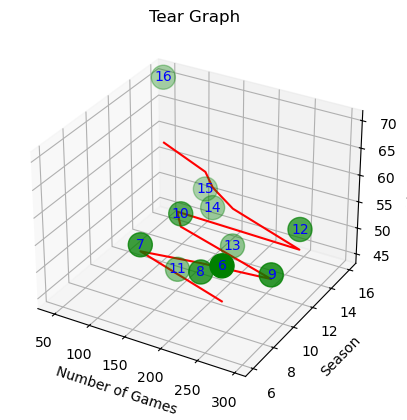

In [136]:
from mpl_toolkits.mplot3d import Axes3D
# 3D 플룻 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Tear Graph')
ax.set_xlabel('Number of Games')
ax.set_ylabel('Season')
ax.set_zlabel('Win Rate')
ax.scatter(X.flatten(), z.flatten(), y, color='green', s=300)
for i in range(len(z)):
    ax.text(X.flatten()[i], z.flatten()[i], y[i], str(int(z[i])), fontsize=10, color='blue', ha='center', va='center')
ax.plot(X.flatten(), z.flatten(), reg.predict(X), color='red')
plt.show()

### 4개의 변수

In [168]:
X = dataset.iloc[:, :1].values.reshape(-1,1)
# 판수

y = dataset.iloc[:, 3].values
# 승률

z = dataset.iloc[:, -1].values
# 시즌

w = dataset.iloc[:, 2].values
# 티어

X[:5], y[:5], z[:5], w[:5]

(array([[ 44],
        [120],
        [145],
        [188],
        [294]], dtype=int64),
 array([70, 53, 52, 48, 57], dtype=int64),
 array([16, 15, 14, 13, 12], dtype=int64),
 array([2423, 2315, 2275, 1713, 2110], dtype=int64))

In [170]:
reg.fit(X, w) # 판수에 따른 티어를 학습

LinearRegression()

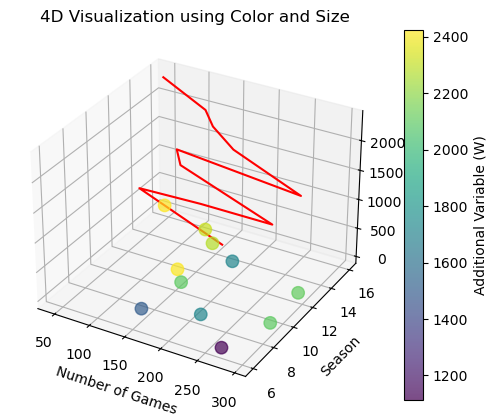

In [192]:
# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('4D Visualization using Color and Size')
ax.set_xlabel('Number of Games')
ax.set_ylabel('Season')
ax.set_zlabel('Win Rate')
# ax.set_zlim(min(y), max(y)) <- z축의 범위를 줄일 순 있음, 하지만 4차원으로 표기하기 때문에 그래프상 예측 그래프가 나타나지않을 수 도 있음
sc = ax.scatter(X, z, y, c=w, s=80, cmap='viridis', alpha=0.7)
cbar = plt.colorbar(sc)
cbar.set_label('Additional Variable (W)')
ax.plot(X.flatten(), z, reg.predict(X), color='red')
plt.show()